## Bank Customer Churn Prediction

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("Churn_Modelling.csv")
backup_df = df
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [71]:
df.shape

(10000, 14)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


##### Columns:
- Customer ID: A unique identifier for each customer
- Surname: The customer's surname or last name
- Credit Score: A numerical value representing the customer's credit score
- Geography: The country where the customer resides (France, Spain or Germany)
- Gender: The customer's gender (Male or Female)
- Age: The customer's age.
- Tenure: The number of years the customer has been with the bank
- Balance: The customer's account balance
- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
- IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
- EstimatedSalary: The estimated salary of the customer
- Exited: Whether the customer has churned (1 = yes, 0 = no)

In [42]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [43]:
dfnull = df[df.isna().any(axis=1)]
df[df.isna().any(axis=1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [44]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2510
Spain      2477
Name: count, dtype: int64

In [45]:
print(f"mean: {df['Age'].mean()}")
print(f"median: {df['Age'].median()}")

mean: 38.92231076892311
median: 37.0


In [46]:
df['HasCrCard'].value_counts()

HasCrCard
1.0    7056
0.0    2945
Name: count, dtype: int64

In [47]:
df['IsActiveMember'].value_counts()

IsActiveMember
1.0    5150
0.0    4851
Name: count, dtype: int64

In [48]:
from sklearn.impute import SimpleImputer

geo = df[['Geography']]
card_active = df[['HasCrCard', 'IsActiveMember']]
age = df[['Age']]

imp_geo = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_card = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_age = SimpleImputer(missing_values=np.nan, strategy='mean')

imputed_geo = imp_geo.fit_transform(geo)
imputed_card = imp_card.fit_transform(card_active)
imputed_age = imp_age.fit_transform(age)

df[['Geography']] = imputed_geo
df[['HasCrCard', 'IsActiveMember']] = imputed_card
df[['Age']] = imputed_age

df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [49]:
dfnull

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [50]:
df[df['RowNumber'].isin([5,7,9,10])]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43.000000,2,125510.82,1,1.0,1.0,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50.000000,7,0.00,2,1.0,1.0,10062.80,0
8,9,15792365,He,501,France,Male,44.000000,4,142051.07,2,0.0,1.0,74940.50,0
9,10,15592389,H?,684,France,Male,38.922311,2,134603.88,1,1.0,1.0,71725.73,0


In [51]:
df.duplicated().sum()

np.int64(2)

In [56]:
df[df.duplicated(keep=False)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [ ]:
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

np.int64(0)

In [58]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


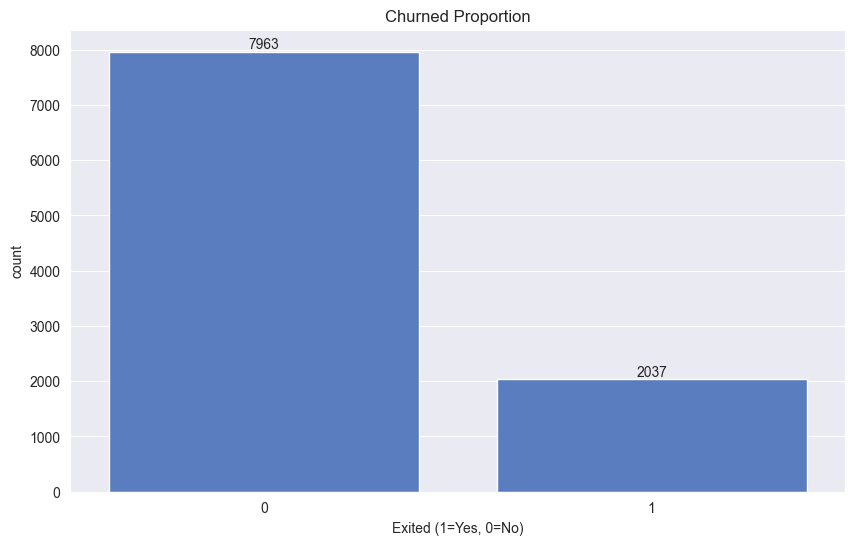

In [110]:
sns.set_style("darkgrid")
sns.set_palette("muted")
plt.figure(figsize=(10,6))
cp = sns.countplot(x=df['Exited'])
cp.bar_label(cp.containers[0]) # type: ignore
plt.title("Churned Proportion")
plt.xlabel("Exited (1=Yes, 0=No)")
plt.show()

In [70]:
df['CreditScore'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0


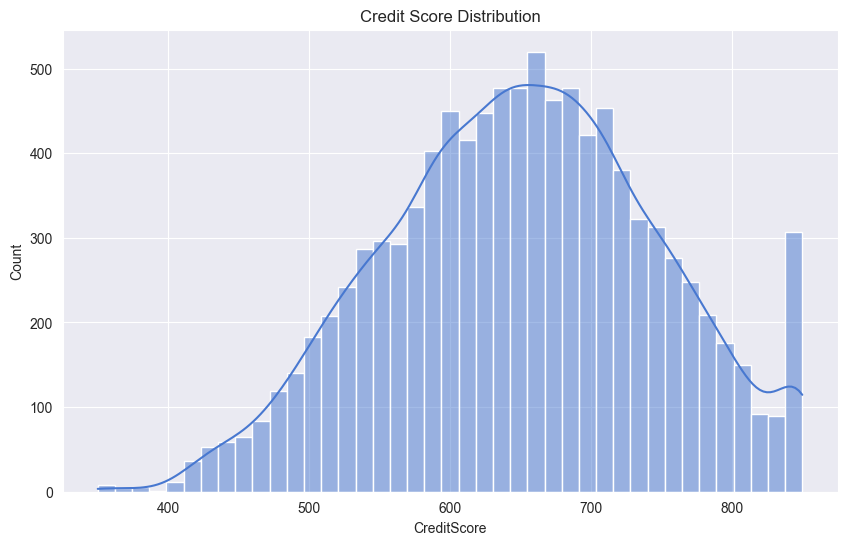

In [76]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['CreditScore'], kde=True)
plt.title("Credit Score Distribution")
plt.show()

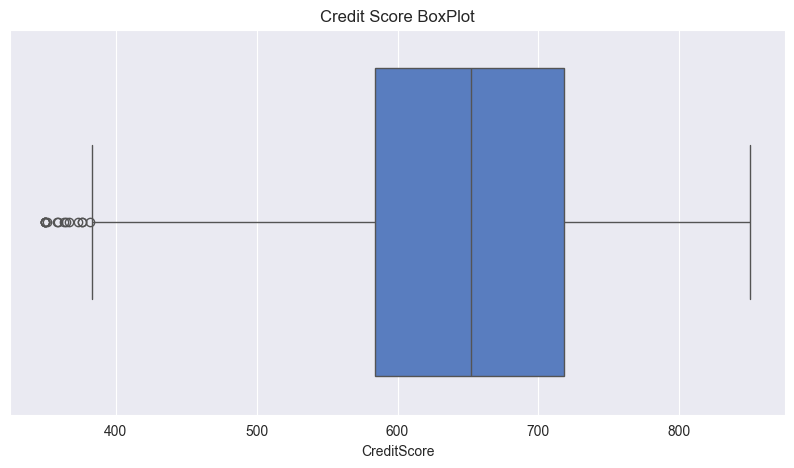

In [89]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['CreditScore'])
plt.title('Credit Score BoxPlot')
plt.show()

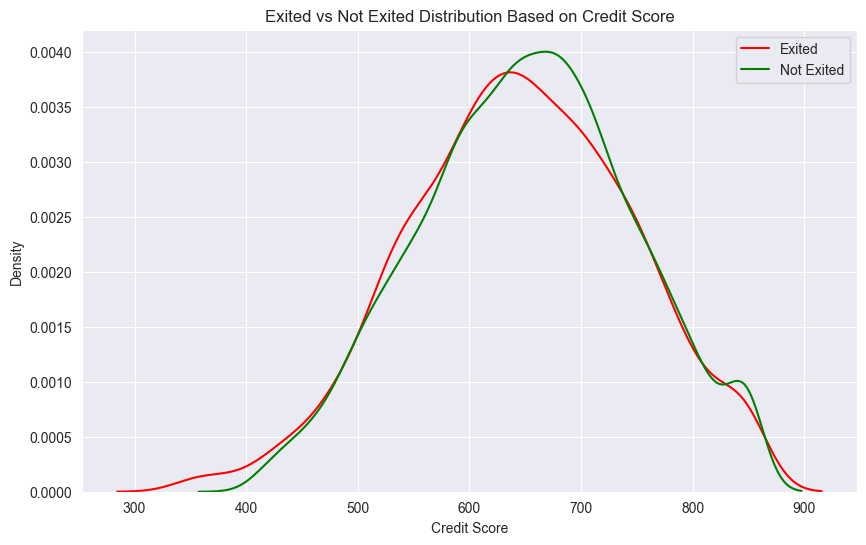

In [115]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['Exited'] == 1]['CreditScore'], label='Exited', color='Red')         # type:ignore
sns.kdeplot(df[df['Exited'] == 0]['CreditScore'], label='Not Exited', color='Green')   # type:ignore
plt.title("Exited vs Not Exited Distribution Based on Credit Score")
plt.xlabel("Credit Score")
plt.legend()
plt.show()

In [116]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


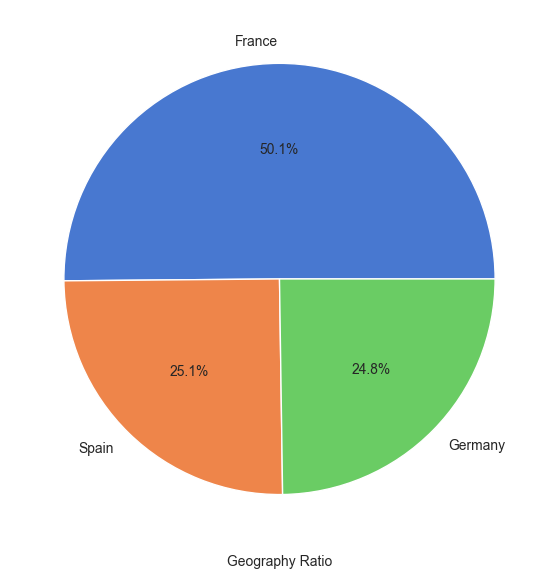

In [133]:
plt.figure(figsize=(10,7))
plt.pie(df['Geography'].value_counts(), autopct="%1.1f%%", labels=df['Geography'].unique())
plt.xlabel("Geography Ratio")
plt.show()

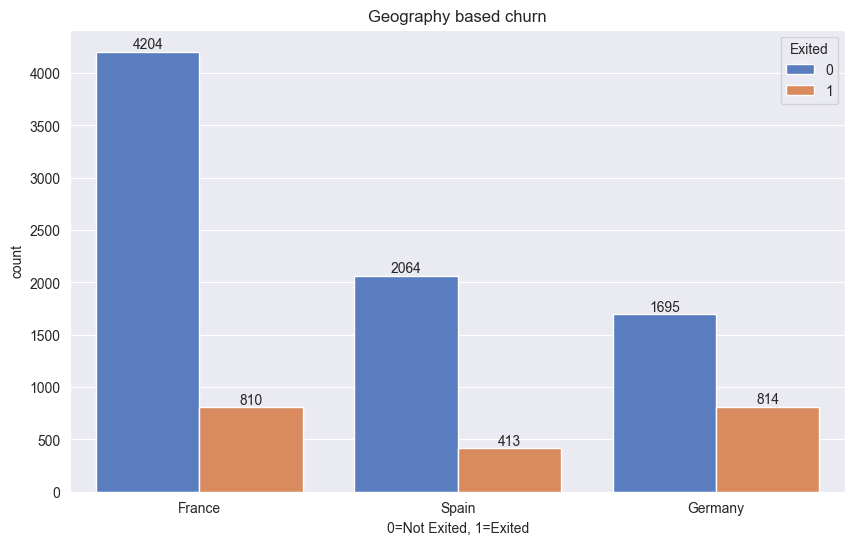

In [145]:
plt.figure(figsize=(10,6))
cp = sns.countplot(x=df['Geography'], hue=df['Exited'])
cp.bar_label(cp.containers[0]) # type: ignore
cp.bar_label(cp.containers[1]) # type: ignore 
plt.title("Geography based churn")
plt.xlabel("0=Not Exited, 1=Exited")
plt.show()

In [146]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


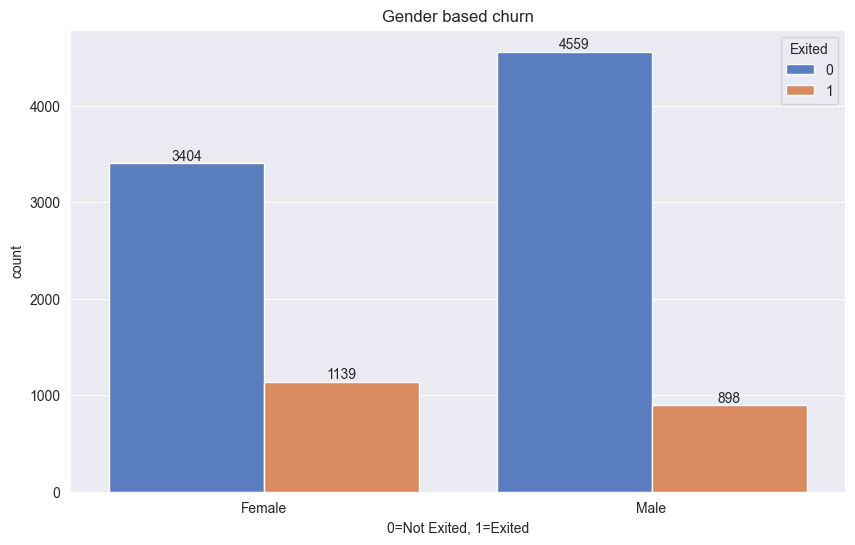

In [150]:
plt.figure(figsize=(10,6))
cp = sns.countplot(x=df['Gender'], hue=df['Exited'])
cp.bar_label(cp.containers[0]) # type: ignore
cp.bar_label(cp.containers[1]) # type: ignore 
plt.title("Gender based churn")
plt.xlabel("0=Not Exited, 1=Exited")
plt.show()

In [152]:
df['Age'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,38.923095,10.48711,18.0,32.0,37.0,44.0,92.0


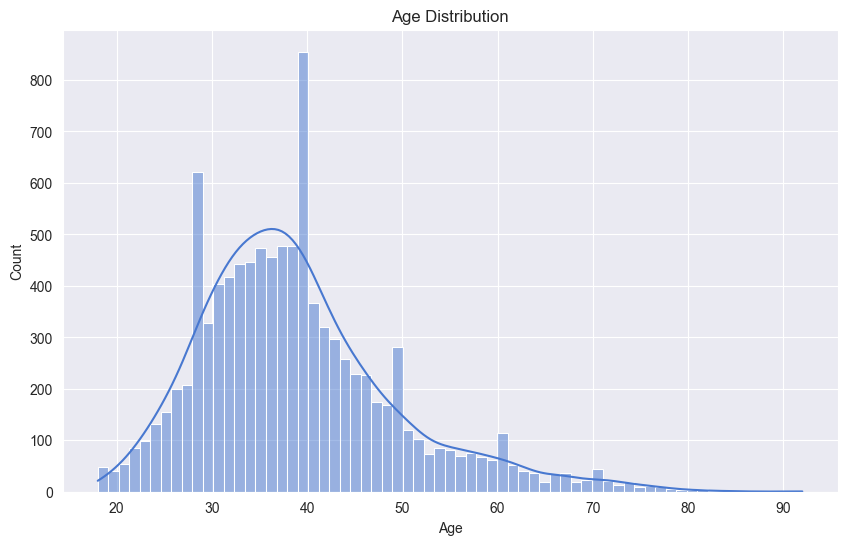

In [155]:
plt.figure(figsize=(10,6))
sns.histplot(df["Age"], kde=True)
plt.title("Age Distribution")
plt.show()

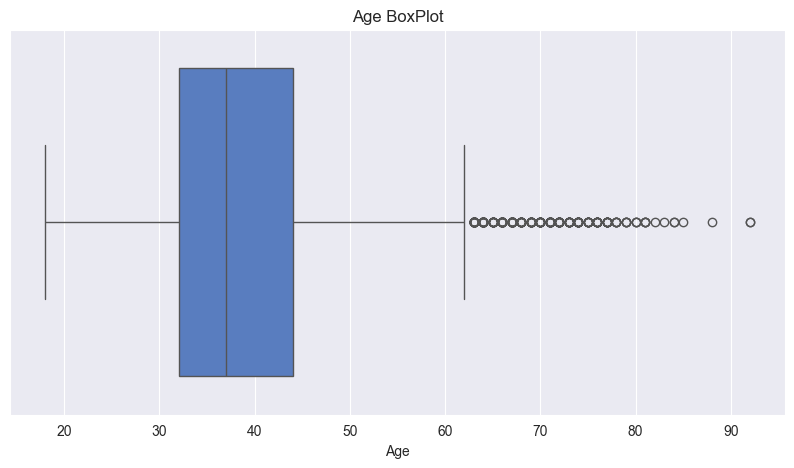

In [156]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Age'])
plt.title('Age BoxPlot')
plt.show()

In [157]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


In [158]:
df['Tenure'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Tenure,10000.0,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
